# Model Implementation
This code covers of implementing Polynomial Regression, Decision Tree and LSTM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Initial Exploration

In this section, we load the S&P 500 index data from a CSV file and display the first and last few rows to understand the dataset's structure.


In [2]:
# import yfinance as yf
# df = yf.download('^SPX', start ='1995-12-27')

df = pd.read_csv('SPX1995.csv')

In [3]:
    df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-01-03,459.209991,459.269989,457.200012,459.109985,459.109985,262450000
1,1995-01-04,459.130005,460.720001,457.559998,460.709991,460.709991,319510000
2,1995-01-05,460.730011,461.299988,459.750000,460.339996,460.339996,309050000
3,1995-01-06,460.380005,462.489990,459.470001,460.679993,460.679993,308070000
4,1995-01-09,460.670013,461.769989,459.739990,460.829987,460.829987,278790000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7336,2024-02-23,5100.919922,5111.060059,5081.459961,5088.799805,5088.799805,3672790000
7337,2024-02-26,5093.000000,5097.660156,5068.910156,5069.529785,5069.529785,3683930000
7338,2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,5078.180176,3925950000
7339,2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,5069.759766,3789370000
7340,2024-02-29,5085.359863,5104.990234,5061.890137,5096.270020,5096.270020,5219740000


In [5]:
df.shape

(7341, 7)

### Data Cleaning: Handling Missing Values and Duplicates

This section focuses on identifying and addressing any missing or duplicated data entries to ensure the quality and reliability of the dataset for further analysis.


In [6]:
missing_values = df.isnull().sum()
df_duplicated= df.duplicated().sum().any()

# here we drop rows if there is missing values 
df_cleaned = df.dropna()

print("Missing values in each column:\n", missing_values)
print("\n \n duplicated values :  ", df_duplicated)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 
 duplicated values :   False


### Column Removal

In this section, we remove columns from the dataset that are not needed for our analysis.

In [7]:
columns_to_drop = ['Adj Close'] 
df = df.drop(columns_to_drop, axis=1)
df

,Date,Open,High,Low,Close,Volume
0,1995-01-03,459.209991,459.269989,457.200012,459.109985,262450000
1,1995-01-04,459.130005,460.720001,457.559998,460.709991,319510000
2,1995-01-05,460.730011,461.299988,459.750000,460.339996,309050000
3,1995-01-06,460.380005,462.489990,459.470001,460.679993,308070000
4,1995-01-09,460.670013,461.769989,459.739990,460.829987,278790000
...,...,...,...,...,...,...
7336,2024-02-23,5100.919922,5111.060059,5081.459961,5088.799805,3672790000
7337,2024-02-26,5093.000000,5097.660156,5068.910156,5069.529785,3683930000
7338,2024-02-27,5074.600098,5080.689941,5057.290039,5078.180176,3925950000
7339,2024-02-28,5067.200195,5077.370117,5058.350098,5069.759766,3789370000




### Visualization of S&P 500 Stock Prices

In this section, we convert the 'Date' column to datetime format for proper indexing and plot the S&P 500 closing and opening prices over time to visualize trends and patterns in the data.


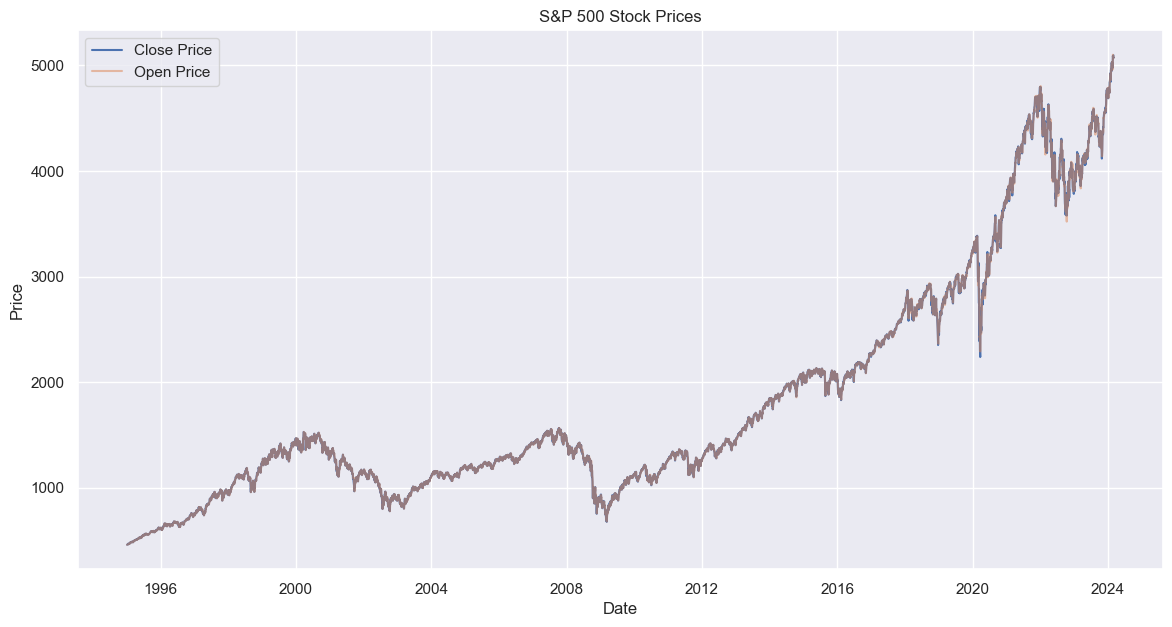

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='darkgrid')

# Convert 'Date' to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing prices against the date
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')

plt.plot(df['Date'], df['Open'], label='Open Price', alpha=0.5)


# Labels and Title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Stock Prices')
plt.legend()

# Show plot
plt.show()


### Feature Preparation

Preparing the dataset for modeling by selecting the 'Open' and 'Volume' as features and 'Close' as the target variable. Converting 'Date' to a numerical format for use in polynomial features.


In [9]:

features = [ 'Open', 'High', 'Low', 'Volume']
target = 'Close'

# We split the data into features and target
X = df[features]
y = df[target]



## Polynomial Regression Implementation

### Data Splitting For Polynomial Regression

Dividing the data into training and test sets to validate the performance of our model. Ensuring a fair distribution without shuffling due to the time-series nature of the data.


In [10]:

degree = 2 
poly_features = PolynomialFeatures(degree=degree)

X_poly = poly_features.fit_transform(X)

# we save the indexes before the split
original_indexes = df.index

# here we split the dataset into training and testing sets by making 80% for training and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X_poly, df['Close'], test_size=0.2, shuffle=False)

print("the train data: --> ", X_train.shape)
print("the test data: --> ", X_test.shape)



the train data: -->  (5872, 15)
the test data: -->  (1469, 15)


### Polynomial Model Initialization and Fitting

Initializing the Linear Regression model and fitting it to the polynomial-transformed training data to capture non-linear patterns in stock prices.


In [11]:

polynomial_model = LinearRegression()
polynomial_model.fit(X_train, y_train)


LinearRegression()

### Preparing Index Alignment Before Making Predictions

Before making predictions, it's important to retrieve and store the original indexes of our training and testing sets. This allows us to maintain a reference to the original dates of our data points, ensuring that after we make our predictions, we can accurately analyze and visualize the results in the context of their specific times in the dataset.


In [12]:

# Retrieve the original indexes for train and test sets
train_indexes = original_indexes[:len(y_train)]
test_indexes = original_indexes[len(y_train):]

print(f'Training data index range: {train_indexes.min()} to {train_indexes.max()}')
print(f'Testing data index range: {test_indexes.min()} to {test_indexes.max()}')

Training data index range: 0 to 5871
Testing data index range: 5872 to 7340


### Model Predictions

After training our regression model, we proceed to make predictions on both the training and testing datasets. These predictions will allow us to evaluate the model's performance by comparing the predicted stock prices against the actual closing prices. It's crucial to ensure that the predictions align with the original data's timeline, hence the index retrieval before this step.


In [13]:
# Predict on the training set for visualization purposes
y_train_poly_pred = polynomial_model.predict(X_train)

# Make predictions on the testing data
y_test_poly_pred = polynomial_model.predict(X_test)

### Organizing and Inspecting Polynomial Regression Prediction Results in Table Form

In this section, we consolidate the predictions with the actual values into structured DataFrames, aligning them with their corresponding dates. This organization is essential for an intuitive inspection of the model's predictive accuracy. It also lays the groundwork for subsequent analysis, such as calculating error metrics and visualizing the results.


In [14]:

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

train_dates = df['Date'].iloc[:len(y_train)].reset_index(drop=True)
test_dates = df['Date'].iloc[-len(y_test):].reset_index(drop=True)


poly_train_results = pd.DataFrame({
    'Date': train_dates,
    'Actual_Close': y_train.reset_index(drop=True),
    'Poly_Predicted_Close': y_train_poly_pred
})

poly_test_results = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test.reset_index(drop=True),
    'Poly_Predicted_Close': y_test_poly_pred
})


print("poly_train_results \n")
print( poly_train_results , "\n \n")

print("poly_test_results \n")
print( poly_test_results)


poly_train_results 

           Date  Actual_Close  Poly_Predicted_Close
0    1995-01-03    459.109985            667.145371
1    1995-01-04    460.709991            675.250452
2    1995-01-05    460.339996            673.398711
3    1995-01-06    460.679993            674.563202
4    1995-01-09    460.829987            670.228492
...         ...           ...                   ...
5867 2018-04-23   2670.290039           2913.400999
5868 2018-04-24   2634.560059           2925.766888
5869 2018-04-25   2639.399902           2846.865873
5870 2018-04-26   2666.939941           2912.266104
5871 2018-04-27   2669.909912           2878.095985

[5872 rows x 3 columns] 
 

poly_test_results 

           Date  Actual_Close  Poly_Predicted_Close
0    2018-04-30   2648.050049           2880.951228
1    2018-05-01   2654.800049           2862.861414
2    2018-05-02   2635.669922           2834.173511
3    2018-05-03   2629.729980           2827.491682
4    2018-05-04   2663.419922           2999.7

### Performance Metrics Evaluation for Polynomial Regression

In this segment, we compute and display the performance metrics for both the training and testing datasets. This evaluation involves Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Root Mean Squared Error (RMSE). These metrics help to quantify the accuracy of our model and reveal how well the predictions match up with the actual stock prices.


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
poly_train_mae = mean_absolute_error(poly_train_results['Actual_Close'], poly_train_results['Poly_Predicted_Close'])
poly_train_rmse = np.sqrt(mean_squared_error(poly_train_results['Actual_Close'], poly_train_results['Poly_Predicted_Close']))
poly_train_mape = mean_absolute_percentage_error(poly_train_results['Actual_Close'], poly_train_results['Poly_Predicted_Close'])

# Calculate metrics for the testing set
poly_test_mae = mean_absolute_error(poly_test_results['Actual_Close'], poly_test_results['Poly_Predicted_Close'])
poly_test_rmse = np.sqrt(mean_squared_error(poly_test_results['Actual_Close'], poly_test_results['Poly_Predicted_Close']))
poly_test_mape = mean_absolute_percentage_error(poly_test_results['Actual_Close'], poly_test_results['Poly_Predicted_Close'])

# Print out the metrics for the training set
print("Training set metrics:")
print(f"Mean Absolute Error (MAE): {poly_train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {poly_train_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {poly_train_mape:.2f}%")

# Print out the metrics for the testing set
print("\nTesting set metrics:")
print(f"Mean Absolute Error (MAE): {poly_test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {poly_test_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {poly_test_mape:.2f}%")



Training set metrics:
Mean Absolute Error (MAE): 61.77
Root Mean Squared Error (RMSE): 81.99
Mean Absolute Percentage Error (MAPE): 5.77%

Testing set metrics:
Mean Absolute Error (MAE): 1301.87
Root Mean Squared Error (RMSE): 1576.16
Mean Absolute Percentage Error (MAPE): 32.09%


### Visualization of Model Predictions Against Actual Data

In accordance with our project's aim to assess machine learning model efficacy, this visualization plots predicted stock prices from our model against the actual S&P 500 closing prices. The graph provides a visual representation of the model's performance over time, showcasing the alignment of predictions with real-world data. This step is crucial for a comprehensive evaluation, allowing for a clear, intuitive understanding of the model's predictive capabilities in both training and testing phases.


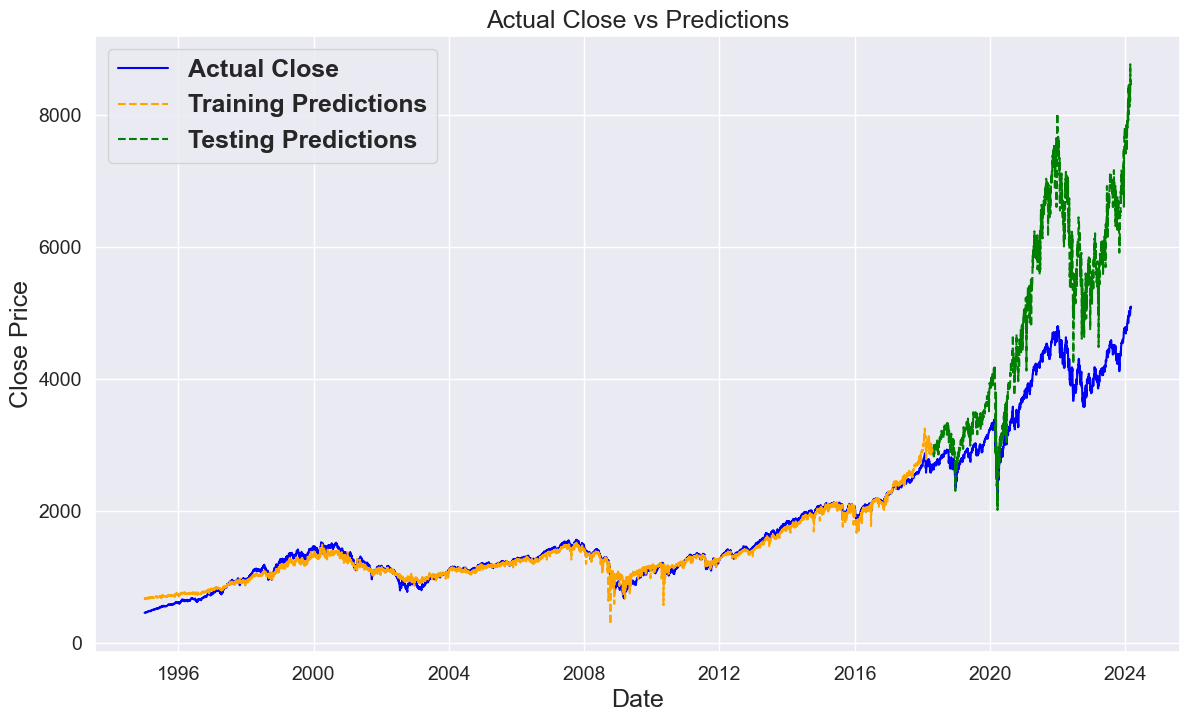

In [16]:

import matplotlib.pyplot as plt
import pandas as pd

# here we Combine the train and the test results into a single DataFrame
poly_combined_results = pd.concat([poly_train_results, poly_test_results])

# Here we Convert 'Date' to datetime and then we sort by date to ensure correct plotting order
poly_combined_results['Date'] = pd.to_datetime(poly_combined_results['Date'])
poly_combined_results.sort_values('Date', inplace=True)

# Set 'Date' as the index for plotting
poly_combined_results.set_index('Date', inplace=True)

# Plot the actual close prices
plt.figure(figsize=(14,8))
plt.plot(poly_combined_results['Actual_Close'], label='Actual Close', color='blue')

# Plot the training predictions 
plt.plot(poly_train_results['Date'], poly_train_results['Poly_Predicted_Close'], label='Training Predictions', color='orange', linestyle='--')

# Plot the testing predictions 
plt.plot(poly_test_results['Date'], poly_test_results['Poly_Predicted_Close'], label='Testing Predictions', color='green', linestyle='--')

plt.xticks(fontsize=14)  # Larger font size for the x-axis ticks
plt.yticks(fontsize=14)  # Larger font size for the y-axis ticks

# Here we just added the labels and title for the graph
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Predictions', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('poly_result_graph.pdf', format='pdf')
plt.show()



## Decision Tree Implementation

### Data Splitting For Decision Tree

Dividing the data into training and test sets to validate the performance of our model. Ensuring a fair distribution without shuffling due to the time-series nature of the data.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

### Initializing and Fitting the Decision Tree Regressor
Initializing the Decision Tree Regressor with specified parameters and fitting it to the training data. This step involves configuring the model with constraints to prevent overfitting and training it to learn patterns from the data

In [18]:
# Initializing the Decision Tree Regressor with specified parameters
decision_model = DecisionTreeRegressor(max_depth=10, min_samples_split=50, min_samples_leaf=20, random_state=42)

# Fitting the Decision Tree model to the training data
decision_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=20, min_samples_split=50,
                      random_state=42)

### Preparing Index Alignment Before Making Predictions

Before making predictions, it's important to retrieve and store the original indexes of our training and testing sets. This allows us to maintain a reference to the original dates of our data points, ensuring that after we make our predictions, we can accurately analyze and visualize the results in the context of their specific times in the dataset.


In [19]:

# Retrieve the original indexes for train and test sets
train_indexes = original_indexes[:len(y_train)]
test_indexes = original_indexes[len(y_train):]

# You can now use train_indexes and test_indexes as they contain the original DataFrame indexes
print(f'Training data index range: {train_indexes.min()} to {train_indexes.max()}')
print(f'Testing data index range: {test_indexes.min()} to {test_indexes.max()}')

Training data index range: 0 to 5871
Testing data index range: 5872 to 7340


### Making Predictions with the Decision Tree Model
After training the Decision Tree model, the next step is to make predictions on both the training and testing datasets. This helps in evaluating the model's performance and understanding how well it generalizes to new, unseen data.

In [20]:
# Predict on the training set for visualization purposes
y_train_decision_pred = decision_model.predict(X_train)

# Make predictions on the testing data
y_test_decision_pred = decision_model.predict(X_test)

### Organizing and Inspecting Decision Tree Prediction Results in Table Form

In this section, we consolidate the predictions with the actual values into structured DataFrames, aligning them with their corresponding dates. This organization is essential for an intuitive inspection of the model's predictive accuracy. It also lays the groundwork for subsequent analysis, such as calculating error metrics and visualizing the results.


In [21]:

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


train_dates = df['Date'].iloc[:len(y_train)].reset_index(drop=True)
test_dates = df['Date'].iloc[-len(y_test):].reset_index(drop=True)


# here we create a DataFrame to store the actual and predicted closing prices for the training set along with their dates
decision_train_results = pd.DataFrame({
    'Date': train_dates,
    'Actual_Close': y_train.reset_index(drop=True),
    'Predicted_Close': y_train_decision_pred
})

# Create a DataFrame to store the actual and predicted closing prices for the testing set along with their dates
decision_test_results = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': y_test.reset_index(drop=True),
    'Predicted_Close': y_test_decision_pred
})


print("decision_train_results \n")
print( decision_train_results , "\n \n")

print("decision_test_results \n")
print( decision_test_results)


decision_train_results 

           Date  Actual_Close  Predicted_Close
0    1995-01-03    459.109985       465.801739
1    1995-01-04    460.709991       465.801739
2    1995-01-05    460.339996       465.801739
3    1995-01-06    460.679993       465.801739
4    1995-01-09    460.829987       465.801739
...         ...           ...              ...
5867 2018-04-23   2670.290039      2650.707147
5868 2018-04-24   2634.560059      2650.707147
5869 2018-04-25   2639.399902      2650.707147
5870 2018-04-26   2666.939941      2650.707147
5871 2018-04-27   2669.909912      2650.707147

[5872 rows x 3 columns] 
 

decision_test_results 

           Date  Actual_Close  Predicted_Close
0    2018-04-30   2648.050049      2650.707147
1    2018-05-01   2654.800049      2650.707147
2    2018-05-02   2635.669922      2650.707147
3    2018-05-03   2629.729980      2650.707147
4    2018-05-04   2663.419922      2650.707147
...         ...           ...              ...
1464 2024-02-23   5088.799805

### Performance Metrics Evaluation for Decision Tree

In this segment, we compute and display the performance metrics for both the training and testing datasets. This evaluation involves Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Root Mean Squared Error (RMSE). These metrics help to quantify the accuracy of our model and reveal how well the predictions match up with the actual stock prices.


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
dt_train_mae = mean_absolute_error(decision_train_results['Actual_Close'], decision_train_results['Predicted_Close'])
dt_train_rmse = np.sqrt(mean_squared_error(decision_train_results['Actual_Close'], decision_train_results['Predicted_Close']))
dt_train_mape = mean_absolute_percentage_error(decision_train_results['Actual_Close'], decision_train_results['Predicted_Close'])

# Calculate metrics for the testing set
dt_test_mae = mean_absolute_error(decision_test_results['Actual_Close'], decision_test_results['Predicted_Close'])
dt_test_rmse = np.sqrt(mean_squared_error(decision_test_results['Actual_Close'], decision_test_results['Predicted_Close']))
dt_test_mape = mean_absolute_percentage_error(decision_test_results['Actual_Close'], decision_test_results['Predicted_Close'])

# Print out the metrics for the training set
print("Training set metrics:")
print(f"Mean Absolute Error (MAE): {dt_train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {dt_train_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {dt_train_mape:.2f}%")

# Print out the metrics for the testing set
print("\nTesting set metrics:")
print(f"Mean Absolute Error (MAE): {dt_test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {dt_test_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {dt_test_mape:.2f}%")



Training set metrics:
Mean Absolute Error (MAE): 6.20
Root Mean Squared Error (RMSE): 8.81
Mean Absolute Percentage Error (MAPE): 0.49%

Testing set metrics:
Mean Absolute Error (MAE): 884.28
Root Mean Squared Error (RMSE): 1111.20
Mean Absolute Percentage Error (MAPE): 21.32%


### Visualizing Decision Tree Model Predictions Against Actual Data
In this section, we visualize the predicted stock prices from the Decision Tree model against the actual S&P 500 closing prices. This step provides a visual representation of the model's performance over time, showcasing how well the predictions align with real-world data. 

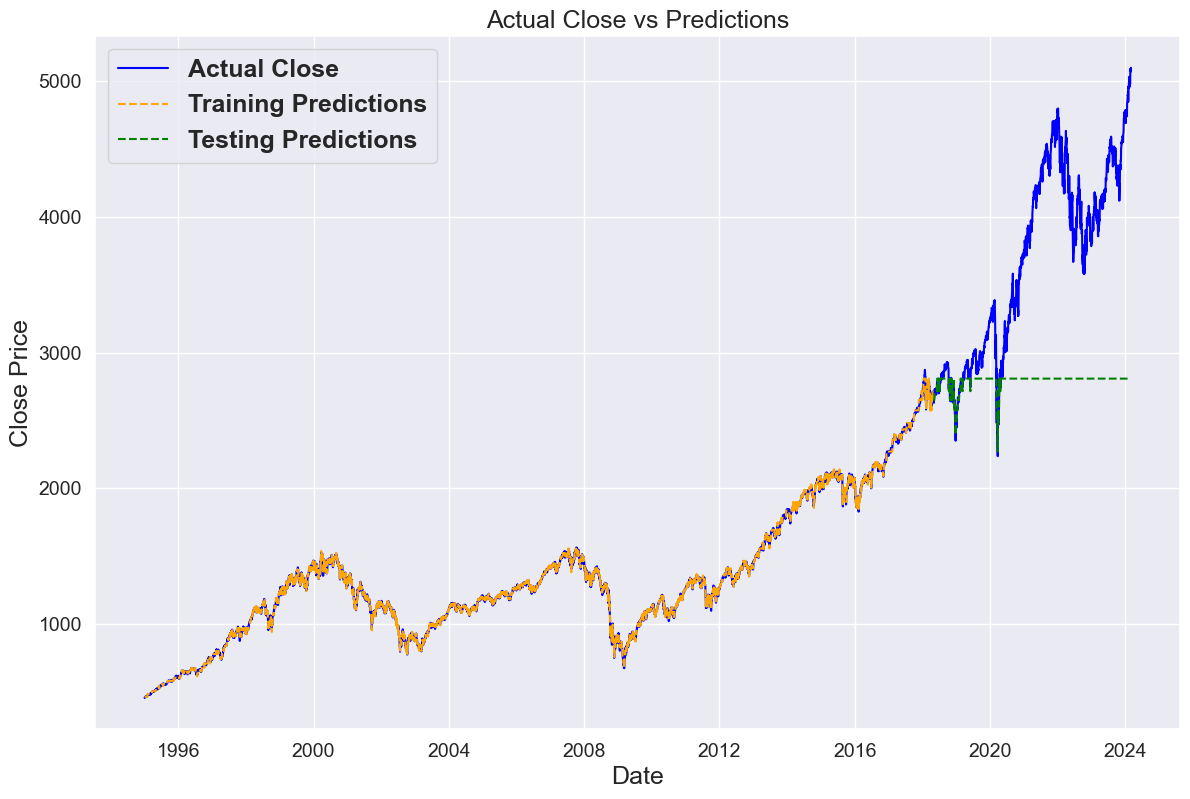

In [23]:

import matplotlib.pyplot as plt
import pandas as pd

# Here we combine train and test results into a single DataFrame.
# This makes it easier to plot and compare the entire dataset's performance in one figure.
decision_combined_results = pd.concat([decision_train_results, decision_test_results])

# Here then we convert 'Date' to datetime and we sort by date to ensure correct plotting order
decision_combined_results['Date'] = pd.to_datetime(decision_combined_results['Date'])
decision_combined_results.sort_values('Date', inplace=True)

# Set 'Date' as the index for plotting
decision_combined_results.set_index('Date', inplace=True)

# Plot the actual close prices
plt.figure(figsize=(14,9))
plt.plot(decision_combined_results['Actual_Close'], label='Actual Close', color='blue')

# Plot the training predictions 
plt.plot(decision_train_results['Date'], decision_train_results['Predicted_Close'], label='Training Predictions', color='orange', linestyle='--')

# Plot the testing predictions 
plt.plot(decision_test_results['Date'], decision_test_results['Predicted_Close'], label='Testing Predictions', color='green', linestyle='--')

# Labels and title are added to provide context to the axes and the plot, making it easier to understand.
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

# Add labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Predictions', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
# plt.savefig('DT_result_graph.pdf', format='pdf')
plt.savefig('analys_dt_graph.pdf', format='pdf')
plt.show()



## LSTM Implementation

### Normalizing Data for LSTM
In this section, we normalize the 'Close' price data using the MinMaxScaler from scikit-learn. Normalization is a crucial step in preparing data for LSTM (Long Short-Term Memory) networks, as it scales the data to a range suitable for training the neural network, ensuring faster convergence and better performance.

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Here we extract the 'Close' price column and reshape it to a 2D array
data_to_normalize = df['Close'].values.reshape(-1, 1)

# And here we create the MinMaxScaler with the feature range between 0 and 1
# This scaler will transform the data to fit within the specified range
scaler = MinMaxScaler(feature_range=(0, 1))

# We then fits the scaler to the data and transforms it
# This step scales the 'Close' price data to the range [0, 1]
scaled_data = scaler.fit_transform(data_to_normalize)

# Then we display the normalized data
scaled_data


array([[0.00000000e+00],
       [3.45040065e-04],
       [2.65250927e-04],
       ...,
       [9.96098939e-01],
       [9.94283084e-01],
       [1.00000000e+00]])

### Creating Sequences for LSTM Model
To prepare the data for the LSTM model, we need to create sequences of a specified length. Each sequence consists of a fixed number of previous time steps, and the output is the next time step. This helps the LSTM model learn the temporal dependencies in the data.

In [25]:
# Function to create sequences and their corresponding labels
# This function generates sequences of 'look_back' length and their corresponding labels (next time step).
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


# We used 30 days of previous data points to predict the next value.
look_back = 30

# Create the dataset with sequences, which generates the input-output pairs using the create_dataset function.
X, y = create_dataset(scaled_data, look_back)

# LSTM expects input in the form of a 3D array [samples, time steps, features], so we reshape accordingly.
X = np.reshape(X, (X.shape[0], look_back, 1))


### Splitting Data into Training and Testing Sets
To train and evaluate the LSTM model effectively, we need to split the data into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data.

In [26]:
# Here we split the data into t80% for raining and 20% for testing sets.
split_percent = 0.80
split = int(split_percent * len(X))

# The first 'split' samples are used for training, and the remaining samples are used for testing.
X_train = X[:split]  # Training data for inputs
y_train = y[:split]  # Training data for outputs
X_test = X[split:]   # Testing data for inputs
y_test = y[split:]   # Testing data for outputs


### Building the LSTM Model
In this section, we define the architecture of the LSTM model, compile it, and prepare it for training. The LSTM model is designed to capture temporal dependencies in the data, making it suitable for time series forecasting.

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Here we add an LSTM layer with 50 units, set return_sequences=True to stack another LSTM layer
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))

# And here we add another LSTM layer with 50 units
# This layer will process the output from the previous LSTM layer.
lstm_model.add(LSTM(50))

# And here a Dense layer with a single unit used to output the predicted value
# This is the final output layer that produces the prediction.
lstm_model.add(Dense(1))

# The Adam optimizer is used for efficient gradient descent, and mean squared error is used as the loss function to minimize prediction error.
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


2024-05-28 00:56:25.905230: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 00:56:28.522801: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-05-28 00:56:28.943085: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-28 00:56:28.944928: I tensorflow/core/common_runtime/executor.cc:11

### Training the LSTM Model
In this section, we train the LSTM model using the training data. We specify the number of epochs, batch size, and validation data to monitor the model's performance on unseen data during training.

In [28]:

# history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']


from keras.callbacks import EarlyStopping

# Initialize EarlyStopping to monitor 'val_loss' with patience of 40 epochs
# EarlyStopping helps to prevent overfitting by monitoring the 'val_loss' (validation loss) during training.
# If the 'val_loss' does not improve for a specified number of epochs (patience), training stops early.
# The 'restore_best_weights' parameter ensures that the model reverts to the weights with the best 'val_loss'.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,  
    verbose=1,
    restore_best_weights=True  
)

# And here we train the LSTM model with early stopping to prevent overfitting
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=110, 
    batch_size=64,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/100


2024-05-28 00:56:29.876702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-28 00:56:29.879038: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-28 00:56:29.881070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

183/183 [==============================] - ETA: 0s - loss: 0.0010

2024-05-28 00:56:49.379607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-28 00:56:49.381585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-28 00:56:49.383205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

183/183 [==============================] - 22s 86ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 2/100
183/183 [==============================] - 14s 79ms/step - loss: 4.5341e-05 - val_loss: 8.3862e-04
Epoch 3/100
183/183 [==============================] - 15s 81ms/step - loss: 4.4514e-05 - val_loss: 8.6462e-04
Epoch 4/100
183/183 [==============================] - 13s 72ms/step - loss: 4.2607e-05 - val_loss: 5.9635e-04
Epoch 5/100
183/183 [==============================] - 14s 76ms/step - loss: 4.4565e-05 - val_loss: 4.7125e-04
Epoch 6/100
183/183 [==============================] - 14s 76ms/step - loss: 4.3605e-05 - val_loss: 5.9436e-04
Epoch 7/100
183/183 [==============================] - 15s 79ms/step - loss: 3.5813e-05 - val_loss: 5.1969e-04
Epoch 8/100
183/183 [==============================] - 14s 79ms/step - loss: 3.6504e-05 - val_loss: 2.8483e-04
Epoch 9/100
183/183 [==============================] - 37s 202ms/step - loss: 3.8940e-05 - val_loss: 2.6909e-04
Epoch 10/100
183/183

### Making Predictions and Inverting the Scale
In this section, we make predictions using the trained LSTM model and then invert the predictions back to the original scale to interpret the results correctly.

In [29]:
# Here we make predictions with the trained LSTM model for both training and testing data
y_train_lstm_pred = lstm_model.predict(X_train)
y_test_lstm_pred = lstm_model.predict(X_test)


# Invert predictions back to original scale
# This step is necessary because the data was scaled before training.
# The scaler.inverse_transform() function is used to convert the scaled values back to their original scale.
y_train_lstm_pred = scaler.inverse_transform(y_train_lstm_pred)
y_train = scaler.inverse_transform([y_train])
y_test_lstm_pred = scaler.inverse_transform(y_test_lstm_pred)
y_test = scaler.inverse_transform([y_test])


2024-05-28 08:32:24.419350: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-28 08:32:24.421438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-28 08:32:24.424167: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

46/46 [==============================] - 2s 47ms/step


### Plotting Training and Validation Loss
In this section, we visualize the training and validation loss over the epochs to evaluate the model's performance and identify the point of minimum validation loss.

In [30]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming 'history.history['val_loss']' contains your validation loss data
# val_loss = np.array(history.history['val_loss'])
# min_val_loss_idx = np.argmin(val_loss)  # Get the index of the minimum validation loss
# min_val_loss = val_loss[min_val_loss_idx]  # Get the minimum validation loss value

# plt.figure(figsize=(10, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.scatter(min_val_loss_idx, min_val_loss, color='red')  # Mark the min point

# # Annotate the min point automatically
# plt.annotate(f'{min_val_loss_idx + 1}',
#              xy=(min_val_loss_idx, min_val_loss),
#              xytext=(min_val_loss_idx, min_val_loss - 0.0001),  # Position it slightly below the point
#              textcoords='offset points',
#              arrowprops=dict(arrowstyle='-|>', color='red'),
#              ha='center', va='top', color='red', fontsize=12, fontweight='bold')

# plt.xticks(fontsize=14)  # Larger font size for the x-axis ticks
# plt.yticks(fontsize=14)

# # Add labels and title
# plt.xlabel('Epochs', fontsize=18)
# plt.ylabel('Loss', fontsize=18)
# plt.title('Model Training and Validation Loss', fontsize=18)
# plt.legend(prop={'size': 18, 'weight': 'bold'})
# plt.savefig('ep_graph1.pdf', format='pdf')
# plt.show()


### Organizing and Inspecting LSTM Prediction Results in Table Form

In this section, we consolidate the predictions with the actual values into structured DataFrames, aligning them with their corresponding dates. This organization is essential for an intuitive inspection of the model's predictive accuracy. It also lays the groundwork for subsequent analysis, such as calculating error metrics and visualizing the results.


In [31]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

look_back = 30  # This should be the same look_back you used earlier in your model

# Ensure the date slices start from the correct index
train_dates = df['Date'][look_back:look_back+len(y_train_lstm_pred)].reset_index(drop=True)
test_dates = df['Date'][look_back+len(y_train_lstm_pred):look_back+len(y_train_lstm_pred)+len(y_test_lstm_pred)].reset_index(drop=True)

# Ensure the close price slices start from the correct index and match the length of the predictions
train_actual_close = df['Close'][look_back:look_back+len(y_train_lstm_pred)].values
test_actual_close = df['Close'][look_back+len(y_train_lstm_pred):look_back+len(y_train_lstm_pred)+len(y_test_lstm_pred)].values

# Create the DataFrame using the aligned data
lstm_train_results = pd.DataFrame({
    'Date': train_dates,
    'Actual_Close': train_actual_close,
    'Predicted_Close': y_train_lstm_pred.flatten() 
})

lstm_test_results = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': test_actual_close,
    'Predicted_Close': y_test_lstm_pred.flatten()  
})


print("Train Results:\n", lstm_train_results)
print("\nTest Results:\n", lstm_test_results)


Train Results:
            Date  Actual_Close  Predicted_Close
0    1995-02-14    482.549988       484.415375
1    1995-02-15    484.540009       485.242249
2    1995-02-16    485.220001       486.972473
3    1995-02-17    481.970001       487.840210
4    1995-02-21    482.720001       485.512848
...         ...           ...              ...
5843 2018-05-01   2654.800049      2660.910645
5844 2018-05-02   2635.669922      2670.742432
5845 2018-05-03   2629.729980      2647.377197
5846 2018-05-04   2663.419922      2644.906006
5847 2018-05-07   2672.629883      2680.181152

[5848 rows x 3 columns]

Test Results:
            Date  Actual_Close  Predicted_Close
0    2018-05-08   2671.919922      2685.506592
1    2018-05-09   2697.790039      2685.966797
2    2018-05-10   2723.070068      2713.422607
3    2018-05-11   2727.719971      2736.490723
4    2018-05-14   2730.129883      2739.522461
...         ...           ...              ...
1457 2024-02-22   5087.029785      4802.567871
145

### Performance Metrics Evaluation for LSTM

In this segment, we compute and display the performance metrics for both the training and testing datasets. This evaluation involves Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE) and Root Mean Squared Error (RMSE). These metrics help to quantify the accuracy of our model and reveal how well the predictions match up with the actual stock prices.


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
lstm_train_mae = mean_absolute_error(lstm_train_results['Actual_Close'], lstm_train_results['Predicted_Close'])
lstm_train_rmse = np.sqrt(mean_squared_error(lstm_train_results['Actual_Close'], lstm_train_results['Predicted_Close']))
lstm_train_mape = mean_absolute_percentage_error(lstm_train_results['Actual_Close'], lstm_train_results['Predicted_Close'])

# Calculate metrics for the testing set
lstm_test_mae = mean_absolute_error(lstm_test_results['Actual_Close'], lstm_test_results['Predicted_Close'])
lstm_test_rmse = np.sqrt(mean_squared_error(lstm_test_results['Actual_Close'], lstm_test_results['Predicted_Close']))
lstm_test_mape = mean_absolute_percentage_error(lstm_test_results['Actual_Close'], lstm_test_results['Predicted_Close'])

# Print out the metrics for the training set
print("Training set metrics:")
print(f"Mean Absolute Error (MAE): {lstm_train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lstm_train_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {lstm_train_mape:.2f}%")

# Print out the metrics for the testing set
print("\nTesting set metrics:")
print(f"Mean Absolute Error (MAE): {lstm_test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lstm_test_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {lstm_test_mape:.2f}%")


Training set metrics:
Mean Absolute Error (MAE): 10.89
Root Mean Squared Error (RMSE): 15.57
Mean Absolute Percentage Error (MAPE): 0.84%

Testing set metrics:
Mean Absolute Error (MAE): 59.42
Root Mean Squared Error (RMSE): 78.99
Mean Absolute Percentage Error (MAPE): 1.51%


### Visualizing LSTM  Model Predictions Against Actual Data
In this section, we visualize the predicted stock prices from the LSTM  model against the actual S&P 500 closing prices. This step provides a visual representation of the model's performance over time, showcasing how well the predictions align with real-world data. 

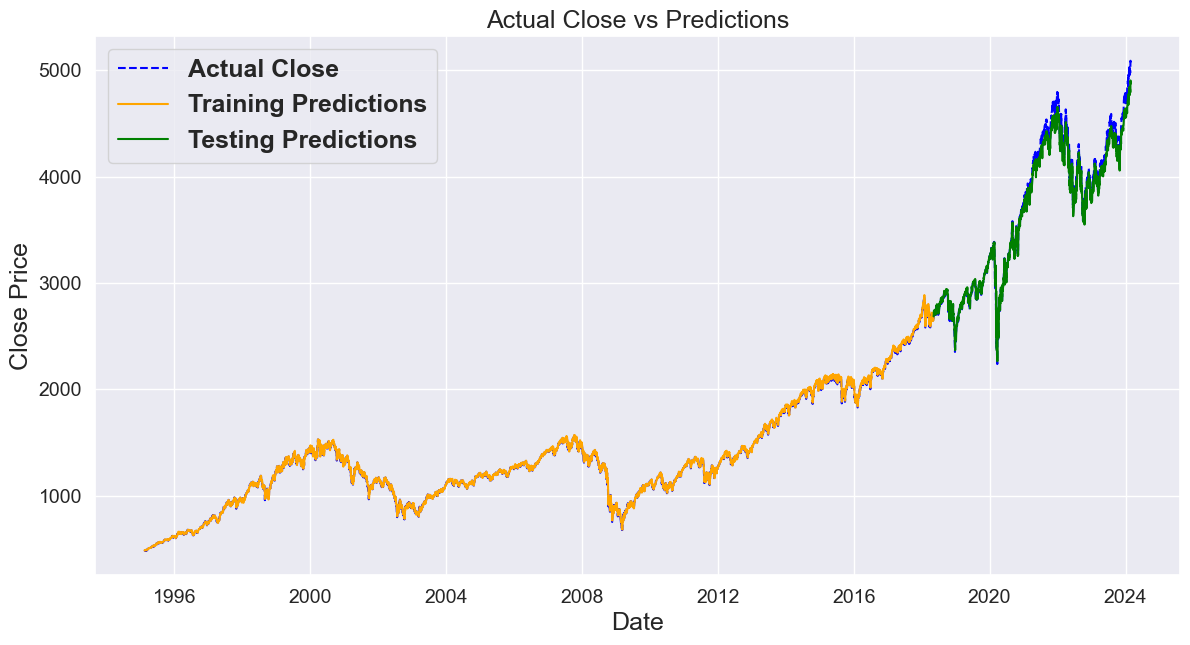

In [33]:

import matplotlib.pyplot as plt
import pandas as pd

# Combine train and test results into a single DataFrame
lstm_combined_results = pd.concat([lstm_train_results, lstm_test_results])

# Convert 'Date' to datetime and sort by date to ensure correct plotting order
lstm_combined_results['Date'] = pd.to_datetime(lstm_combined_results['Date'])
lstm_combined_results.sort_values('Date', inplace=True)

# Set 'Date' as the index for plotting
lstm_combined_results.set_index('Date', inplace=True)

# Plot the actual close prices
plt.figure(figsize=(14,7))
plt.plot(lstm_combined_results['Actual_Close'], label='Actual Close', color='blue' , linestyle='--')

# Plot the training predictions 
plt.plot(lstm_train_results['Date'], lstm_train_results['Predicted_Close'], label='Training Predictions', color='orange')

# Plot the testing predictions 
plt.plot(lstm_test_results['Date'], lstm_test_results['Predicted_Close'], label='Testing Predictions', color='green')


plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)

# Added labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Predictions', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('lstm_result_graph.pdf', format='pdf')
plt.show()



## Comparison for All_Models together

### Creating a Comparison Table for All Models
In this section, we prepare and merge the prediction results from the polynomial regression, decision tree, and LSTM models into a single table for easy comparison.

In [34]:

# Convert 'Date' columns to datetime if they're not already
poly_test_results['Date'] = pd.to_datetime(poly_test_results['Date'])
decision_test_results['Date'] = pd.to_datetime(decision_test_results['Date'])
lstm_test_results['Date'] = pd.to_datetime(lstm_test_results['Date'])

poly_train_results['Date'] = pd.to_datetime(poly_train_results['Date'])
decision_train_results['Date'] = pd.to_datetime(decision_train_results['Date'])
lstm_train_results['Date'] = pd.to_datetime(lstm_train_results['Date'])

# Merge the train and test results for each model
poly_results = pd.concat([poly_train_results, poly_test_results]).sort_values('Date')
decision_results = pd.concat([decision_train_results, decision_test_results]).sort_values('Date')
lstm_results = pd.concat([lstm_train_results, lstm_test_results]).sort_values('Date')

# Merge the results on the Date field
merged_results = pd.merge(poly_results, decision_results,  on=['Date', 'Actual_Close'])
combined_results = pd.merge(merged_results, lstm_results, on=['Date', 'Actual_Close'])
#merged_resultss = pd.merge(poly_results, decision_results, lstm_results, on=['Date', 'Actual_Close'])

# Rename columns for clarity
combined_results.rename(columns={
    'Poly_Predicted_Close': 'Poly_Predicted',
    'Predicted_Close_x': 'Decision_Tree_Predicted',
    'Predicted_Close_y': 'LSTM_Predicted'
}, inplace=True)

# Set the 'Date' column as index
combined_results.set_index('Date', inplace=True)


# print(combined_results.to_string())

print("Train Results:\n", combined_results.head().to_string())
print("\nTest Results:\n", combined_results.tail().to_string())


Train Results:
             Actual_Close  Poly_Predicted  Decision_Tree_Predicted  LSTM_Predicted
Date                                                                             
1995-02-14    482.549988      679.072165               486.522944      484.415375
1995-02-15    484.540009      690.029350               486.522944      485.242249
1995-02-16    485.220001      686.626128               486.522944      486.972473
1995-02-17    481.970001      685.117534               486.522944      487.840210
1995-02-21    482.720001      679.872469               486.522944      485.512848

Test Results:
             Actual_Close  Poly_Predicted  Decision_Tree_Predicted  LSTM_Predicted
Date                                                                             
2024-02-22   5087.029785     8765.893054              2808.062512     4802.567871
2024-02-23   5088.799805     8617.675638              2808.062512     4903.547363
2024-02-26   5069.529785     8548.768183              2808.062512 

### Plotting Actual Close vs. Predictions for All Models
In this section, we plot the actual closing prices against the predictions made by the polynomial regression, decision tree, and LSTM models to visually compare their performances.

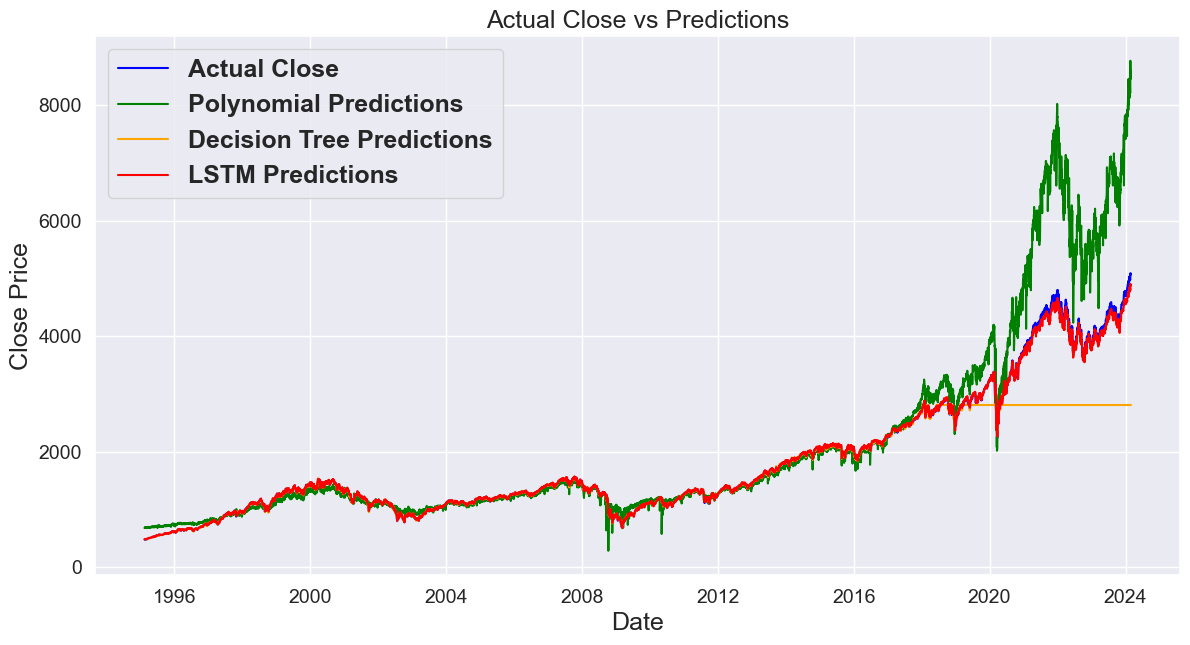

In [35]:

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(combined_results.index, combined_results['Actual_Close'], label='Actual Close', color='blue', linestyle='-')
plt.plot(combined_results.index, combined_results['Poly_Predicted'], label='Polynomial Predictions', color='green', linestyle='-')
plt.plot(combined_results.index, combined_results['Decision_Tree_Predicted'], label='Decision Tree Predictions', color='orange', linestyle='-')
plt.plot(combined_results.index, combined_results['LSTM_Predicted'], label='LSTM Predictions', color='red', linestyle='-')
 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Predictions', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('actual_vs_predictions_graph1.pdf', format='pdf')
plt.show()   


### Zoomed-In Plot of Actual Close vs. Model Predictions (Testing Phase)
In this section, we create a zoomed-in plot to focus on the testing results, showing the performance of polynomial regression, decision tree, and LSTM models from 2018 onwards.

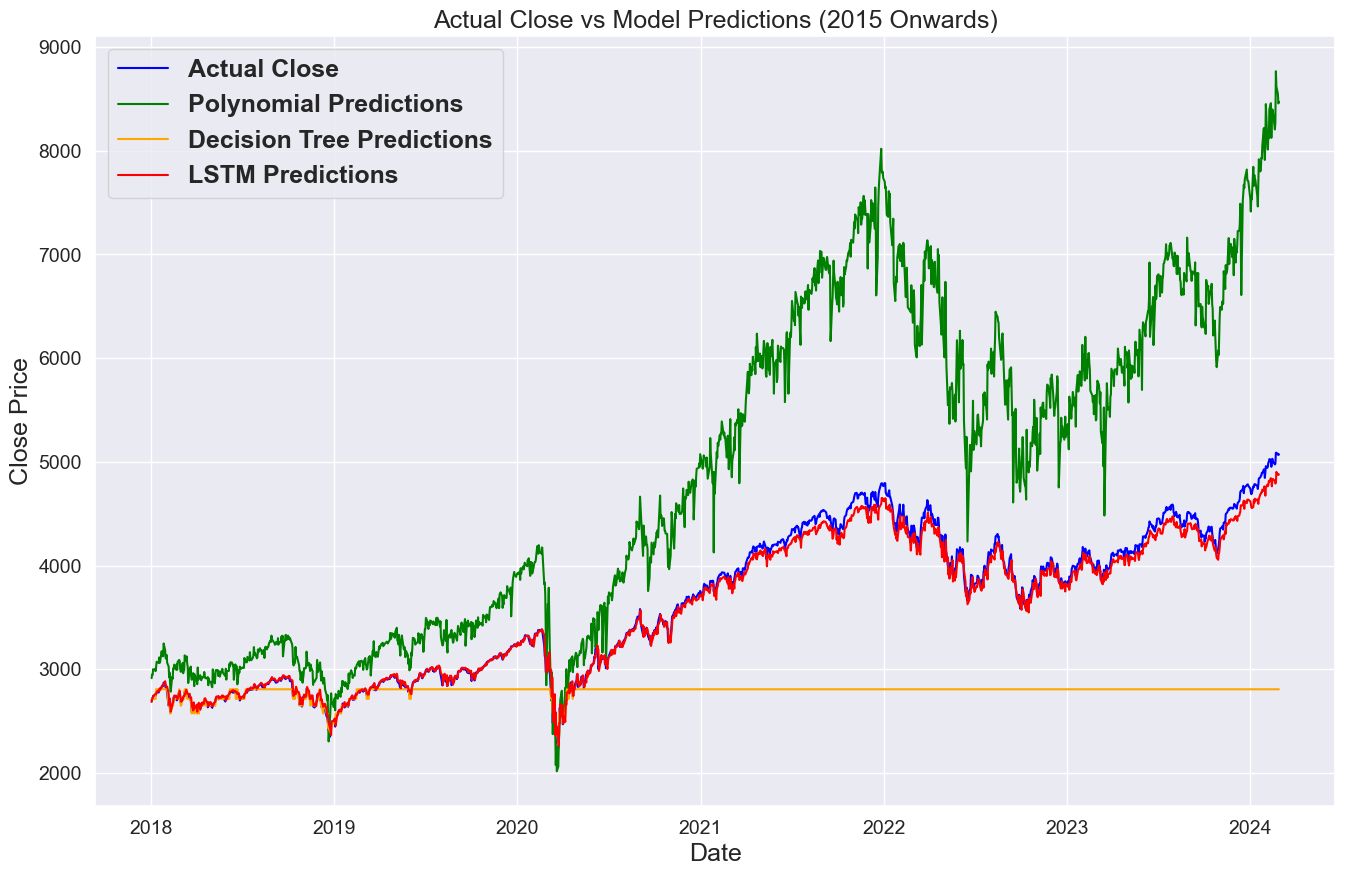

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


if 'Date' not in combined_results.columns:
    combined_results.reset_index(inplace=True)

combined_results['Date'] = pd.to_datetime(combined_results['Date'])

combined_results.set_index('Date', inplace=True)

zoomed_results = combined_results['2018-01-01':]


plt.figure(figsize=(16, 10))
plt.plot(zoomed_results['Actual_Close'], label='Actual Close', color='blue', linestyle='-')
plt.plot(zoomed_results['Poly_Predicted'], label='Polynomial Predictions', color='green', linestyle='-')
plt.plot(zoomed_results['Decision_Tree_Predicted'], label='Decision Tree Predictions', color='orange', linestyle='-')
plt.plot(zoomed_results['LSTM_Predicted'], label='LSTM Predictions', color='red', linestyle='-')


plt.xticks(fontsize=14)  # Larger font size for the x-axis ticks
plt.yticks(fontsize=14)
# Add labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Model Predictions (2015 Onwards)', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('zoomed_test_predictions_graph3.pdf', format='pdf')
plt.show()


### Zoomed-In Plot of Actual Close vs. Model Predictions (Training Phase)
In this section, we create a zoomed-in plot to focus on the training results, showing the performance of polynomial regression, decision tree, and LSTM models from 2004 to 2007.

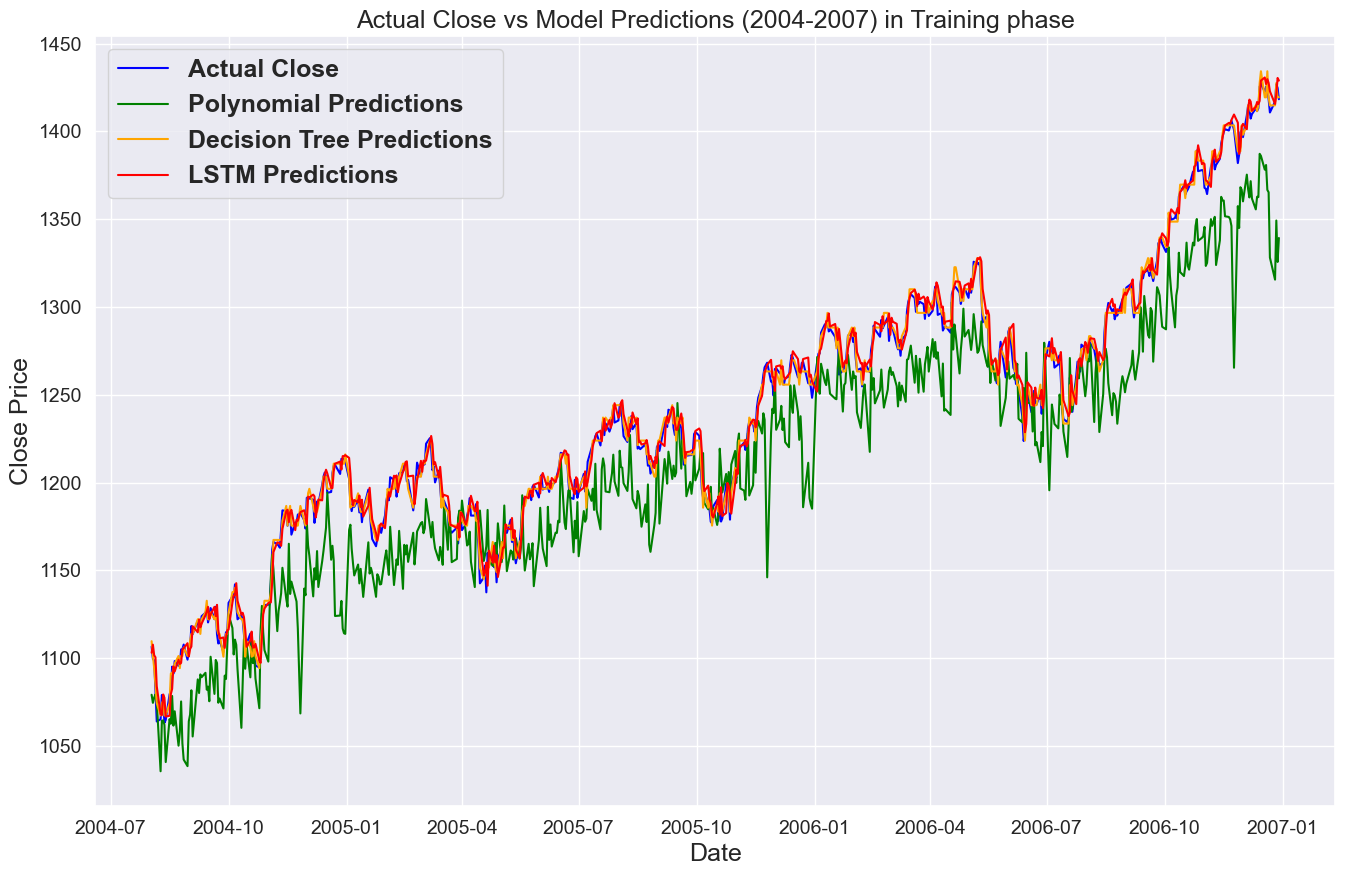

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' is a column
if 'Date' not in combined_results.columns:
    combined_results.reset_index(inplace=True)

combined_results['Date'] = pd.to_datetime(combined_results['Date'])

# Set the 'Date' column as index
combined_results.set_index('Date', inplace=True)

zoomed_results = combined_results['2004-08-01':'2006-12-31']

# Plotting
plt.figure(figsize=(16, 10))
plt.plot(zoomed_results['Actual_Close'], label='Actual Close', color='blue', linestyle='-')
plt.plot(zoomed_results['Poly_Predicted'], label='Polynomial Predictions', color='green', linestyle='-')
plt.plot(zoomed_results['Decision_Tree_Predicted'], label='Decision Tree Predictions', color='orange', linestyle='-')
plt.plot(zoomed_results['LSTM_Predicted'], label='LSTM Predictions', color='red', linestyle='-')



plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
# Add labels and title
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title('Actual Close vs Model Predictions (2004-2007) in Training phase', fontsize=18)
plt.legend(prop={'size': 18, 'weight': 'bold'})
plt.savefig('zoomed_training_predictions_graph2.pdf', format='pdf')
plt.show()


### Comparison of Model Performance Metrics
To compare the performance of different models (Polynomial Regression, Decision Tree, and LSTM), we plot the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) for both the training and testing datasets. These metrics provide insights into the accuracy and reliability of each model.

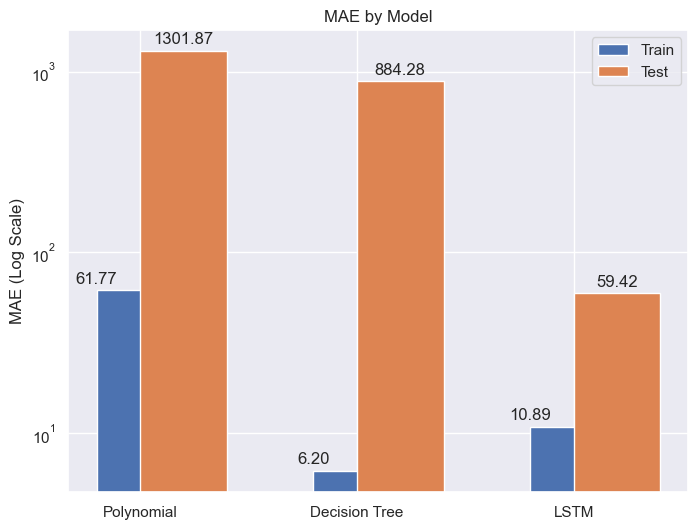

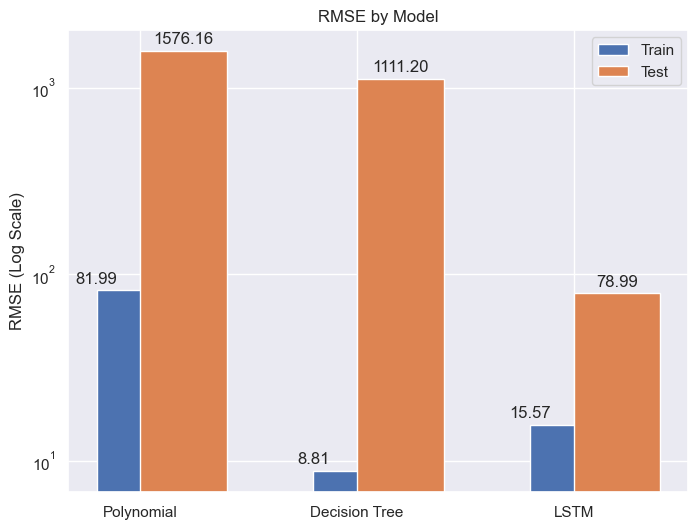

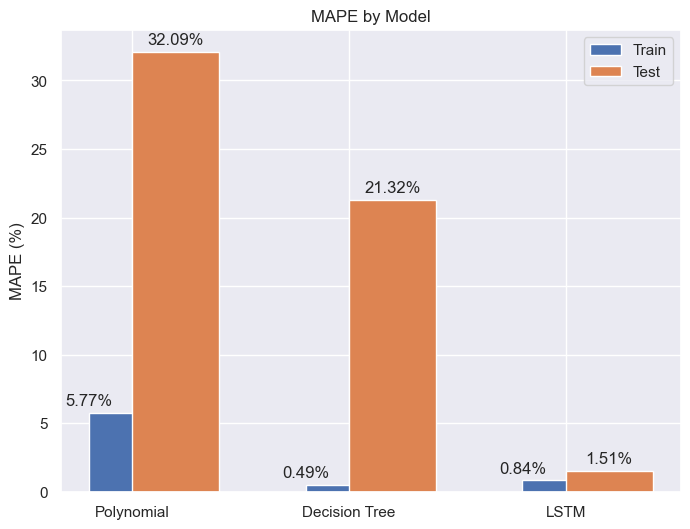

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data setup
data = {
    'Model': ['Polynomial', 'Decision Tree', 'LSTM'],
    'MAE_Train': [poly_train_mae, dt_train_mae, lstm_train_mae],
    'RMSE_Train': [poly_train_rmse, dt_train_rmse, lstm_train_rmse],
    'MAPE_Train': [poly_train_mape, dt_train_mape, lstm_train_mape],  
    'MAE_Test': [poly_test_mae, dt_test_mae, lstm_test_mae],
    'RMSE_Test': [poly_test_rmse, dt_test_rmse, lstm_test_rmse],
    'MAPE_Test': [poly_test_mape, dt_test_mape, lstm_test_mape],  
}

df = pd.DataFrame(data)

def plot_metric(metric):
    fig, ax = plt.subplots(figsize=(8, 6))
    metric_train = metric + '_Train'
    metric_test = metric + '_Test'
    ind = df['Model']
    train = df[metric_train]
    test = df[metric_test]

    # Create bar plot
    bars1 = ax.bar(ind, train, width=0.4, label='Train', align='center')
    bars2 = ax.bar(ind, test, width=0.4, label='Test', align='edge')

    if metric == 'MAPE':
        ax.set_ylabel(f'{metric} (%)')  # Set y-label as percentage for MAPE
        for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2 - 0.2, height),  
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    else:
        ax.set_ylabel(f'{metric} (Log Scale)')
        ax.set_yscale('log')  # Set y-scale to log for MAE and RMSE
        for bar in bars1:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2 - 0.2, height),  
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
        for bar in bars2:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    ax.set_title(f'{metric} by Model')
    ax.legend()

    plt.savefig(f'{metric}_comparison_evaluation.pdf', format='pdf')  
    plt.show()

# Plotting each metric
metrics = ['MAE', 'RMSE', 'MAPE']
for metric in metrics:
    plot_metric(metric)